In [1]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import applications
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras import initializers

#from keras_sequential_ascii import sequential_model_to_ascii_printout
from keras import backend as K
import IPython.display
from glob import glob

import numpy as np
import matplotlib.pyplot as plt
import copy
from scipy.io import wavfile

import scipy.ndimage
from datetime import datetime
import os

if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

# Import Tensorflow with multiprocessing
import tensorflow as tf
import multiprocessing as mp

# Loading the CIFAR-10 datasets
from keras.datasets import cifar10

from sklearn.model_selection import train_test_split

C:\Users\deep_learning\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
img_width, img_height = 80,80

top_model_weights_path ='bottleneck_fc_model.h5'
train_data_dir = 'mfcc_clips1'


In [524]:
nb_train_samples = 240
epochs = 100
batch_size = 1

In [525]:
datagen = ImageDataGenerator(rescale=1. / 255)

In [526]:
 model = applications.VGG16(include_top=False, weights='imagenet')


In [527]:
generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None, shuffle=False)
   
    

Found 240 images belonging to 1 classes.


In [528]:
bottleneck_features_train = model.predict_generator(
        generator, nb_train_samples // batch_size)
    

In [529]:
np.save(open('bottleneck_mfcc_clips1_features_train.npy', 'wb'),
            bottleneck_features_train)


In [2]:
c1 = np.load('bottleneck_spec_c1_10_features_train.npy')
c2 = np.load('bottleneck_spec_c2_10_features_train.npy')
mfcc = np.load('bottleneck_mfcc_clips_features_train.npy')
mfcc1 = np.load('bottleneck_mfcc_clips1_features_train.npy')
spec = np.load('bottleneck_spec_clips_features_train.npy')
spec1 = np.load('bottleneck_spec_clips1_features_train.npy')


In [3]:
spec1.shape

(240, 512, 2, 2)

In [5]:
mfcc1.shape

(240, 512, 2, 2)

In [6]:
spec.shape

(356, 512, 2, 2)

In [7]:
mfcc.shape

(356, 512, 2, 2)

In [3]:
s = np.concatenate((spec1,mfcc1),axis=1)
m =  np.concatenate((spec,mfcc),axis=1)


In [4]:
d1 = np.load('label_clips.npy')
d2 = np.load('label_clips1.npy')


In [5]:
data_m = np.concatenate((mfcc,mfcc1),axis=0)
data_s = np.concatenate((spec,spec1),axis=0)
data_sc1c2 = np.concatenate((spec,c1,c2),axis=0)
data_sm = np.concatenate((s,m),axis=0)

In [6]:
label_m =  np.concatenate((d1,d2),axis=0)
label_s =  np.concatenate((d1,d2),axis=0)
label_sc1c2 =  np.concatenate((d1,d2,d2),axis=0)
label_sm = np.concatenate((d2,d1),axis=0)

In [7]:
data_x = data_s
data_y = label_s

In [23]:
data_x.shape


(596, 512, 2, 2)

In [24]:
d1.shape

(356, 1)

In [25]:
data_y.shape

(596, 1)

In [8]:
unique, counts = np.unique(data_y, return_counts=True)
dict(zip(unique, counts))

{0: 68, 1: 51, 2: 45, 3: 77, 4: 50, 5: 44, 6: 62, 7: 65, 8: 66, 9: 68}

In [17]:
x_train, x_test, y_train, y_test = train_test_split(data_x,data_y, stratify=data_y, test_size=0.2)

In [18]:
x_train.shape

(476, 512, 2, 2)

In [19]:
x_test.shape

(120, 512, 2, 2)

In [20]:
import keras
num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [21]:

model = Sequential()  
model.add(Flatten(input_shape=x_train.shape[1:]))  
model.add(Dense(1024, activation='relu')) 
  
model.add(Dropout(0.1))  

  
model.add(Dense(num_classes, activation='softmax'))
        
model.compile(optimizer='adam',  
              loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit(x_train, y_train,  
          epochs=100,  
          batch_size=4,  
          validation_data=(x_test, y_test))  

Train on 476 samples, validate on 120 samples
Epoch 1/100
476/476 [==============================] - 5s 10ms/step - loss: 2.5065 - acc: 0.1408 - val_loss: 2.2141 - val_acc: 0.2917
Epoch 2/100
476/476 [==============================] - 1s 2ms/step - loss: 2.1654 - acc: 0.2542 - val_loss: 2.0571 - val_acc: 0.2083
Epoch 3/100
476/476 [==============================] - 1s 2ms/step - loss: 2.0287 - acc: 0.2710 - val_loss: 1.9106 - val_acc: 0.3417
Epoch 4/100
476/476 [==============================] - 1s 1ms/step - loss: 1.9832 - acc: 0.2815 - val_loss: 1.8731 - val_acc: 0.3333
Epoch 5/100
476/476 [==============================] - 1s 2ms/step - loss: 1.8801 - acc: 0.3088 - val_loss: 1.8930 - val_acc: 0.3167
Epoch 6/100
476/476 [==============================] - 1s 2ms/step - loss: 1.8317 - acc: 0.3340 - val_loss: 1.8316 - val_acc: 0.3333
Epoch 7/100
476/476 [==============================] - 1s 2ms/step - loss: 1.7748 - acc: 0.3676 - val_loss: 1.8061 - val_acc: 0.3083
Epoch 8/100
476/476 [=

Epoch 62/100
476/476 [==============================] - 1s 2ms/step - loss: 0.9952 - acc: 0.6597 - val_loss: 1.3900 - val_acc: 0.4750
Epoch 63/100
476/476 [==============================] - 1s 2ms/step - loss: 1.0145 - acc: 0.6324 - val_loss: 1.4916 - val_acc: 0.4750
Epoch 64/100
476/476 [==============================] - 1s 2ms/step - loss: 1.0084 - acc: 0.5945 - val_loss: 1.3934 - val_acc: 0.4917
Epoch 65/100
476/476 [==============================] - 1s 2ms/step - loss: 0.9679 - acc: 0.6492 - val_loss: 1.5247 - val_acc: 0.4333
Epoch 66/100
476/476 [==============================] - 1s 2ms/step - loss: 1.0010 - acc: 0.6366 - val_loss: 1.3959 - val_acc: 0.4417
Epoch 67/100
476/476 [==============================] - 1s 2ms/step - loss: 0.9663 - acc: 0.6366 - val_loss: 1.5276 - val_acc: 0.3917
Epoch 68/100
476/476 [==============================] - 1s 2ms/step - loss: 0.9618 - acc: 0.6197 - val_loss: 1.4197 - val_acc: 0.4500
Epoch 69/100
476/476 [==============================] - 1s 2ms

In [8]:
data =  data_x.reshape(596,2048)


In [9]:
data

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.02145505, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.09961267, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.14252825, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, predict_y):
    C = confusion_matrix(y_test, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
   
    
    B =(C/C.sum(axis=0))
   
    labels = [0,1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

In [11]:
x_train, x_test, y_train, y_test = train_test_split(data,data_y, stratify=data_y, test_size=0.2)

In [12]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import log_loss,accuracy_score
from sklearn import datasets, preprocessing,cross_validation, feature_extraction
from sklearn import linear_model, svm, metrics, ensemble, tree, ensemble

In [14]:
test_data_len = x_test.shape[0]





# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,10))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,10)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)


Log loss on Test Data using Random Model 2.622431381663523


0.5416666666666666
             precision    recall  f1-score   support

          0       0.28      0.36      0.31        14
          1       0.33      0.20      0.25        10
          2       0.50      0.44      0.47         9
          3       1.00      0.88      0.93        16
          4       0.43      0.90      0.58        10
          5       0.67      0.44      0.53         9
          6       0.82      0.75      0.78        12
          7       0.75      0.69      0.72        13
          8       0.45      0.38      0.42        13
          9       0.31      0.29      0.30        14

avg / total       0.56      0.54      0.54       120

-------------------------------------------------- Confusion matrix --------------------------------------------------


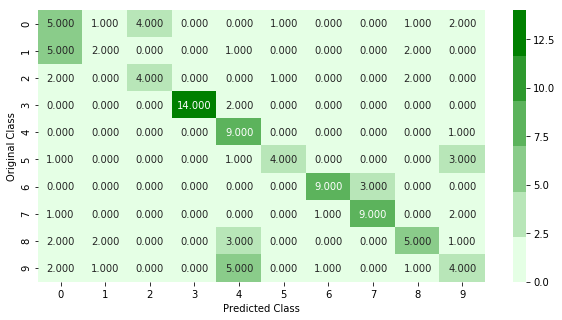

-------------------------------------------------- Precision matrix --------------------------------------------------


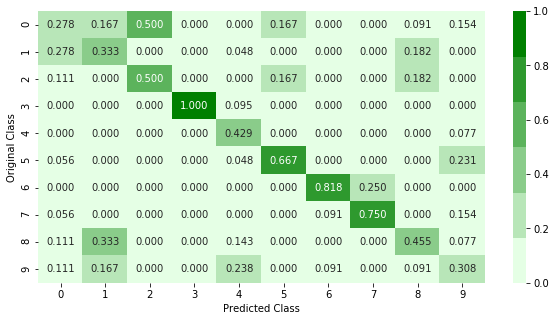

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


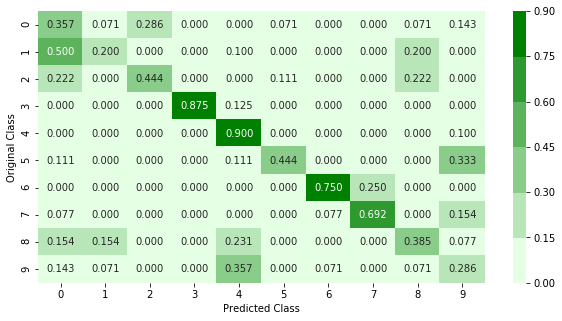

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [15]:
clf = svm.SVC(kernel='linear',class_weight="balanced", max_iter=10000,probability=True)
clf.fit(x_train,y_train)
clf_predict = clf.predict(x_test)
predictions = clf.predict_proba(x_test)
print(clf.score(x_test,y_test))
print(metrics.classification_report(y_test, clf_predict))

plot_confusion_matrix(y_test,clf_predict)


log_loss for c =  10 is 0.5166666666666667
log_loss for c =  50 is 0.5583333333333333
log_loss for c =  100 is 0.55
log_loss for c =  500 is 0.55
log_loss for c =  1000 is 0.5416666666666666
log_loss for c =  2000 is 0.5333333333333333


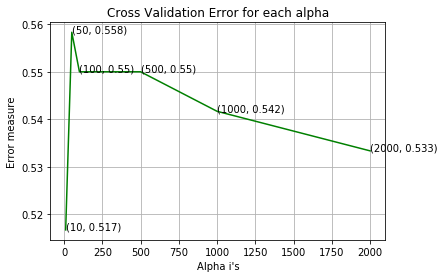

For values of best alpha =  50 The train log loss is: 1.0
For values of best alpha =  50 The test log loss is: 0.5583333333333333
-------------------------------------------------- Confusion matrix --------------------------------------------------


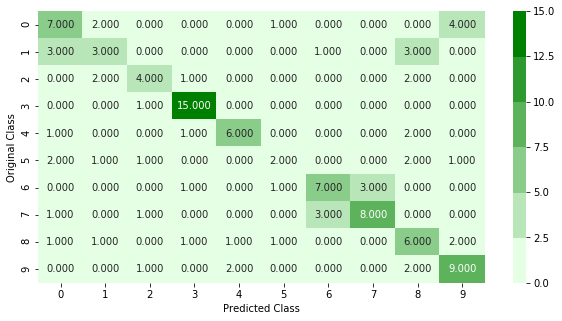

-------------------------------------------------- Precision matrix --------------------------------------------------


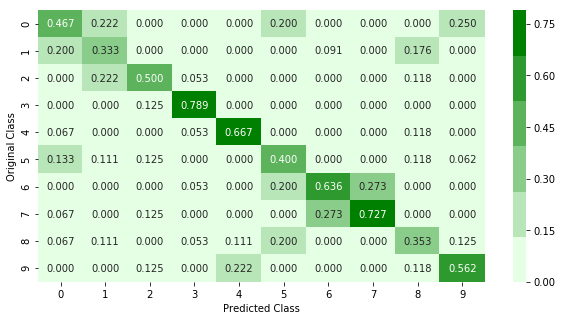

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


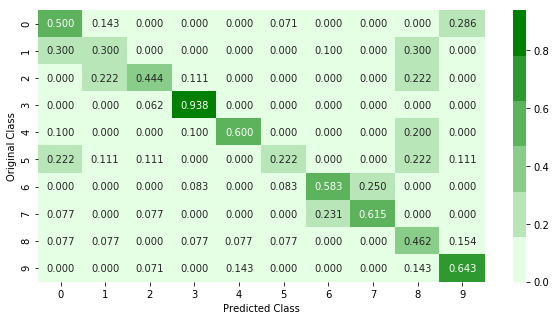

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [13]:
from xgboost import XGBClassifier
alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in alpha:
    k_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    k_cfl.fit(x_train,y_train)
    predict_y = k_cfl.predict(x_test)
    cv_log_error_array.append(accuracy_score(y_test, predict_y))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmax(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
k_cfl.fit(x_train,y_train)

    
predict_y = k_cfl.predict(x_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",accuracy_score(y_train, predict_y))

predict_y = k_cfl.predict(x_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",accuracy_score(y_test, predict_y))
plot_confusion_matrix(y_test,k_cfl.predict(x_test))



In [22]:
predictions = k_cfl.predict_proba(x_test)
print(predictions)

[[0.08715448 0.05639175 0.04173095 ... 0.01796805 0.25602014 0.10701509]
 [0.00578534 0.01085317 0.01173536 ... 0.01600279 0.04010397 0.01677278]
 [0.09781299 0.2347556  0.0531711  ... 0.03225154 0.1695679  0.24590701]
 ...
 [0.06303479 0.0983421  0.08444327 ... 0.01903514 0.22276162 0.1499766 ]
 [0.16277429 0.18417862 0.2027639  ... 0.04079908 0.12279719 0.09003792]
 [0.0190993  0.03103399 0.04474793 ... 0.00244353 0.05863411 0.03462457]]


In [23]:
p = np.argsort(-predictions)


In [24]:
predictions.shape

(120, 10)

In [25]:
predictions = np.array(predictions)

miss_count = 0

hit_top_1 = 0
hit_top_2 = 0
hit_top_3 = 0
hit_top_4 = 0
for  i in range(len(predictions)):
    p1 = p[i][0]
    
    p2 = p[i][1]
    p3 = p[i][2]
    p4 = p[i][3]
   
    
    if p1 == y_test[i]:
        hit_top_1 += 1
       
        
    if p2 == y_test[i]:
        hit_top_2 += 1
        
       
    if p3 == y_test[i]:
        hit_top_3 += 1
       
       
    if p4 == y_test[i]:
        hit_top_4 += 1
        
        
    else:
        miss_count +=1

hit_top_2 += hit_top_1
hit_top_3 += hit_top_2
hit_top_4 += hit_top_3

top_1_percentage = hit_top_1*100/len(predictions)
top_2_percentage = hit_top_2*100/len(predictions)
top_3_percentage = hit_top_3*100/len(predictions)
top_4_percentage = hit_top_4*100/len(predictions)

print(f"Accuracy @ Top 1 predictions = {top_1_percentage}%")
print(f"Accuracy @ Top 2 predictions = {top_2_percentage}%")
print(f"Accuracy @ Top 3 predictions = {top_3_percentage}%")


Accuracy @ Top 1 predictions = 54.166666666666664%
Accuracy @ Top 2 predictions = 69.16666666666667%
Accuracy @ Top 3 predictions = 79.16666666666667%


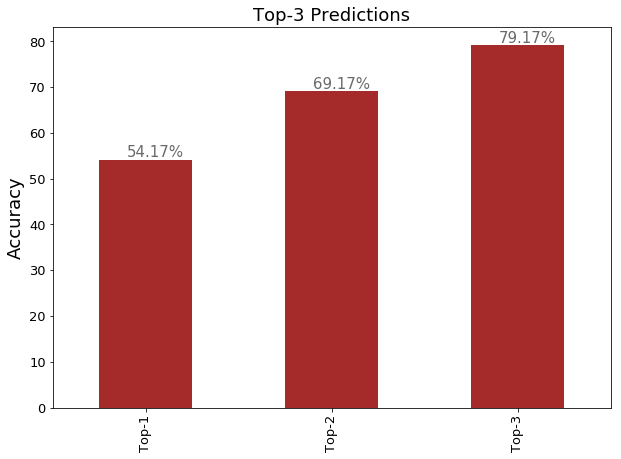

In [42]:
import pandas as pd
x_labels = ["Top-1","Top-2","Top-3"]
frequencies = [top_1_percentage,top_2_percentage,top_3_percentage]
freq_series = pd.Series.from_array(frequencies)
ax = freq_series.plot(kind='bar', figsize=(10,7),
                                        color="brown", fontsize=13);
ax.set_alpha(0.8)
ax.set_title('Top-3 Predictions',fontsize=18)
ax.set_ylabel('Accuracy',fontsize=18)
ax.set_xticklabels(x_labels)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.15, i.get_height()+.5, \
            str(round((i.get_height()), 2))+'%', fontsize=15,
                color='dimgrey')

In [14]:
import os
import sys
import subprocess
import cv2
from glob import glob
from datetime import datetime
from collections import Counter

In [15]:
def vgg():
    
    img_width, img_height = 80,80
    top_model_weights_path = 'bottleneck_fc_model.h5'
    train_data_dir = 'real_clips'

    nb_train_samples = 5

    epochs = 50
    batch_size = 1
    
    #Function to compute VGG-16 CNN for image feature extraction.
    train_target = []
    
    datagen = ImageDataGenerator(rescale=1. / 255)
    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')
    generator_train = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    
    
     

    bottleneck_features_train = model.predict_generator(generator_train, nb_train_samples // batch_size)
   
    bottleneck_features_train =  bottleneck_features_train.reshape(5,2048)
    #print(bottleneck_features_train.shape)
    np.save(open('real_features.npy', 'wb'), bottleneck_features_train)
#     prediction()
 

In [16]:
def resize():
    data = glob("real_clips\\1\\*.png")

   
    for image in data:
        
       
        img = cv2.imread(image)
        img = cv2.resize(img,(80,80))
        cv2.imwrite("real_clips/1/{}.png".format(image.split('\\')[2].split('.')[0]),img)
    features = vgg()    

In [17]:
def spec(path):
    

    start = datetime.now()
    f = path
    rate, X = scipy.io.wavfile.read(f)
    
    i=1
    len = np.shape(X)[0]/float(rate)
    
    if len >= 160: 
        
        x1 = X[rate*30:rate*50]
        x2 = X[rate*50:rate*70]
        x3 = X[rate*60:rate*80]
        x4 = X[rate*120:rate*140]
        x5 = X[rate*140:rate*160]
        
    x1 = scipy.mean(x1, axis=1)
    x2 = scipy.mean(x2, axis=1)
    x3 = scipy.mean(x3, axis=1)
    x4 = scipy.mean(x4, axis=1)
    x5 = scipy.mean(x5, axis=1)

    plt.specgram(x1, Fs=rate)
    plt.axis('off')
    plt.savefig("real_clips/1/{}.png".format(str(i)), bbox_inches='tight')
    plt.close()
    i=i+1
    plt.specgram(x2, Fs=rate)
    plt.axis('off')
    plt.savefig("real_clips/1/{}.png".format(str(i)), bbox_inches='tight')
    plt.close()
    i=i+1
    plt.specgram(x3, Fs=rate)
    plt.axis('off')
    plt.savefig("real_clips/1/{}.png".format(str(i)), bbox_inches='tight')
    plt.close()
    i=i+1
    plt.specgram(x4, Fs=rate)
    plt.axis('off')
    plt.savefig("real_clips/1/{}.png".format(str(i)), bbox_inches='tight')
    plt.close()
    i=i+1
    plt.specgram(x5, Fs=rate)
    plt.axis('off')
    plt.savefig("real_clips/1/{}.png".format(str(i)), bbox_inches='tight')
    plt.close()
    
    #plt.show
    resize()
    
    #print('Time taken for file :',f, datetime.now() - start, "the size of the fIle is", os.stat(f).st_size)


In [ ]:
import IPython.display
from eyed3 import id3
from pydub import AudioSegment


 

labels = {0:'arijit',1:'armaan',2:'atif',3:'kishore_kumar',4:'kumar_sanu',5:'mohit',6:'shaan',
          7:'shreya',8:'sonu_nigam',9:'sunidhi'}
 
path = ("real_set\\kishore_kumar\\2.wav")
 
#AudioSegment.from_wav(path).export("mp3/file.mp3", format="mp3")
# audio = eyed3.load('mp3/file.mp3')
# print(audio)
# print(audio.tag.artist)
# print(audio.tag.album)
# print(audio.tag.title)

l= [k for k,v in labels.items() if v == path.split("\\")[1]]
l=l[0]

#print("Song Name : "+"MUJH MAIN KAHIN BAAKI HAI")
pred = spec(path)
a = []

x = np.load('real_features.npy')

pre = k_cfl.predict_proba(x)
p =  np.argsort(-pre)
for i in range(len(pre)):
    p1 = p[i][0]
    a.append(p1)

print("Original Singer : ",path.split("\\")[1])
c1 = Counter(a)
#print(c1)
m1 = max(a,key=a.count)
#print(m1)
r1 = [k for k in c1 if c1[k] == m1]
if l in r1:
    print("Predicted Singer : {}".format(labels.get(l)))
else:
    print("Predicted Singer : {}".format(labels.get(m1)))

v = [(labels.get(i), c1[i] / len(a) * 100.0)  for i, count in c1.most_common()]
print("Predicted Singer Percentage : ",v)

print("Music Audio : ")

rate, X = wavfile.read(path)
IPython.display.Audio(data=X.T, rate = rate)
               
       


Found 5 images belonging to 1 classes.
